In [102]:
import numpy as np
np.random.seed(42)

In [103]:
def generate_dataset():
    num_samples_class1 = 10
    num_samples_class2 = 6
    num_samples_class3 = 13
    cov = np.array([[1,0],[0,1]]) # Covarianz-Matrix
    # Mehrdimensionale Normalverteilung mit unterschiedlichen Zentren
    data1 = np.random.multivariate_normal(np.array([0,0]), cov, num_samples_class1)
    data2 = np.random.multivariate_normal(np.array([-10,4]), cov, num_samples_class2)
    data3 = np.random.multivariate_normal(np.array([10,10]), cov, num_samples_class3)
    data = np.concatenate((data1,data2,data3), axis = 0)
    classes = np.array(
        [0 for i in range(num_samples_class1)] + 
        [1 for i in range(num_samples_class2)] +
        [2 for i in range(num_samples_class3)]
    )
    return data, classes

In [104]:
x, y = generate_dataset()
#print(f"x-shape: {x.shape}")
#print(f"y-shape {y.shape}")
#print(f"x:\n{x}")
#print(f"y:\n{y}")

In [105]:
import matplotlib.pyplot as plt
def plot_data(x,y):
    colors = ["red",  "blue", "green"]
    for index, point in enumerate(x):
        plt.scatter(point[0],point[1], color = colors[y[index]])
    plt.show()

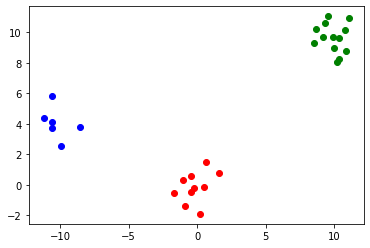

In [106]:
plot_data(x,y)

## KNN Implementation

In [107]:
class KNeighborClassifier:
    def __init__(self, n_neighbors: int=5):
        self.n_neighbors = n_neighbors
        self.X: np.ndarray
        self.y: np.ndarray
        self.num_classes: int

    def _distance(self, p1:np.ndarray, p2:np.ndarray):
        return np.linalg.norm(p1-p2)

    def kneighbors(self, X:np.ndarray):
        distances = np.array([[self._distance(sample, x_i) for x_i in self.X] for sample in X])
        # Für jeden Punkt/jedes Sample wird in dieser Schleife die Distanz zu jedem anderen Punkt ermittelt
        sorted_distances_idxs = np.argsort(distances[:])
        kneighbor_idxs = sorted_distances_idxs[:, :self.n_neighbors]
        return kneighbor_idxs

    def fit(self, X:np.ndarray, Y:np.ndarray):
        self.X = X
        self.y = y
        self.num_classes = len(np.unique(self.y))

    def _vote_class(self, kneighbors_idxs: np.ndarray):
        votes = np.zeros(shape=(self.num_classes))
        neighbors_classes = self.y[kneighbors_idxs]
        for neighbor_class in neighbors_classes:
            votes[neighbor_class] += 1
        voted_class = np.argmax(votes) # Index der Klasse mit dem Maximum
        return voted_class

    def predict(self, X:np.ndarray):
        kneighbors_idxs = self.kneighbors(X)
        y_pred = np.array([self._vote_class(kneighbor_idxs) for kneighbor_idxs in kneighbors_idxs])
        return y_pred

    def score(self, X:np.ndarray, Y:np.ndarray):
        y_pred = self.predict(X)
        accuracy = np.mean(y_pred == y)
        return accuracy


In [108]:
x_test = np.array(
    [[0.0, 4.0],
    [-5.0, 4.0]]
)
y_test = np.array(
    [0, 1]
)

clf = KNeighborClassifier(n_neighbors=3)
clf.fit(x,y)

y_pred = clf.predict(x_test)
accuracy = clf.score(x_test, y_test)

print(f"x_test:\n {x_test}")
print(f"y_test:\n {y_test}")
print(f"y_pred:\n {y_pred}")
print(f"score: {accuracy}")

x_test:
 [[ 0.  4.]
 [-5.  4.]]
y_test:
 [0 1]
y_pred:
 [0 1]
score: 0.0


ipykernel_launcher:38: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


In [140]:
def plot_knn_prediction(clf: KNeighborClassifier, X_samples: np.ndarray, y_pred: np.ndarray, X: np.ndarray, y: np.ndarray):
    colors = ["red",  "blue", "green"]
    for index, point in enumerate(x):
        plt.scatter(point[0],point[1], color = colors[y[index]])
    neighbors_idxs = clf.kneighbors(X_samples)
    for index, point in enumerate(X_samples):
        neighbors_pts = clf.X[neighbors_idxs][index]
        neighbors_classes = clf.y[neighbors_idxs][index]
        plt.scatter(point[0], point[1], color = colors[y_pred[index]], marker = "*", s = 120)
        for neighbor_point, neighbor_class in zip(neighbors_pts, neighbors_classes):
            plt.plot((neighbor_point[0], point[0]), (neighbor_point[1], point[1]), color = colors[neighbor_class])
    plt.show()

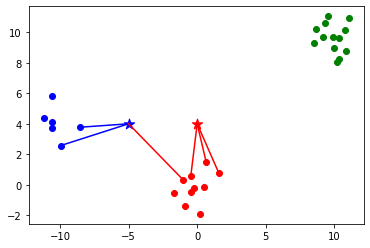

In [141]:
plot_knn_prediction(clf, x_test, y_pred, x, y)